сегодня мы поговорим о синтаксических анализаторах: посмотрим на их функции в деталях на примере UDPipe, но в конце тетрадки вспомним про другие(обзорно) и попробуем на парктике

## UDPipe

In [1]:
# ячейка может выполняться долго, это нормально
! pip3 install ufal.udpipe

     |████████████████████████████████| 304 kB 5.2 MB/s 
  Created wheel for ufal.udpipe: filename=ufal.udpipe-1.2.0.3-cp37-cp37m-linux_x86_64.whl size=5626631 sha256=f8a60786017739f2f7d3e5f2199ba1486d1d5fe1688440e8c1aa53cd22041eb3
  Stored in directory: /root/.cache/pip/wheels/b8/b5/8e/3da091629a21ce2d10bf90759d0cb034ba10a5cf7a01e83d64
Successfully built ufal.udpipe


UDPipe - это готовый пайплайн* для токенизации, частеречной разметки, лемматизации и синтаксической разметки. Работает с файлами в формате [CoNLL-U](https://universaldependencies.org/format.html#syntactic-annotation)
<br>
Есть как готовые [предобученные модели](https://github.com/jwijffels/udpipe.models.ud.2.0/tree/master/inst/udpipe-ud-2.0-170801), так и возможность обучить модель на своих данных (но это небыстро). 

Использует теги [UD-формата](https://universaldependencies.org/)
______
*пайплайном называют цепочку из нескольких инструментов, используемых один за другим (pipeline, от англ. pipe- труба)*

поля в CoNLL-U формате:

* ID: Word index, integer starting at 1 for each new sentence; may be a range for multiword tokens; may be a decimal number for empty nodes (decimal numbers can be lower than 1 but must be greater than 0)
* FORM: Word form or punctuation symbol.
* LEMMA: Lemma or stem of word form.
* UPOS: Universal part-of-speech tag.
* XPOS: Language-specific part-of-speech tag; underscore if not available.
* FEATS: List of morphological features from the universal feature inventory or from a defined language-specific extension; underscore if not available.
* HEAD: Head of the current word, which is either a value of ID or zero (0).
* DEPREL: Universal dependency relation to the HEAD (root iff HEAD = 0) or a defined language-specific subtype of one.
* DEPS: Enhanced dependency graph in the form of a list of head-deprel pairs.
* MISC: Any other annotation.

Так выглядит текст в CoNLL-U формате

    1	Мэр	_	NOUN	_	Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing|fPOS=NOUN++	2	nsubj	_	_
    2	открыл	_	VERB	_	Aspect=Perf|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act|fPOS=VERB++	0	ROOT	_	_
    3	новый	_	ADJ	_	Animacy=Inan|Case=Acc|Degree=Pos|Gender=Masc|Number=Sing|fPOS=ADJ++	4	amod	_	_
    4	парк	_	NOUN	_	Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing|fPOS=NOUN++	2	dobj	_	_
    5	и	_	CONJ	_	fPOS=CONJ++	4	cc	_	_
    6	детскую	_	ADJ	_	Case=Acc|Degree=Pos|Gender=Fem|Number=Sing|fPOS=ADJ++	7	amod	_	_
    7	площадку	_	NOUN	_	Animacy=Inan|Case=Acc|Gender=Fem|Number=Sing|fPOS=NOUN++	4	conj	_	_
    8	.	_	PUNCT	.	fPOS=PUNCT++.	2	punct	_	_

**всякое про UDPipe**
* [общая информация](http://ufal.mff.cuni.cz/udpipe#language_models)
* [мануал](http://ufal.mff.cuni.cz/udpipe/users-manual)
* [репозиторий](https://github.com/ufal/udpipe)
* [статья с описанием архитектуры](http://ufal.mff.cuni.cz/~straka/papers/2017-conll_udpipe.pdf)
* [онлайн-версия](http://lindat.mff.cuni.cz/services/udpipe/)



### шаг1: установка библиотеки
полная информация о разных способах установки UDPipe [здесь](http://ufal.mff.cuni.cz/udpipe/install)
<br>
Мы попробуем простую, установив UPpipe как специальную библиотеку для питона, через ```pip3```

[документация для питонской библиотеки](https://pypi.org/project/ufal.udpipe/)

In [2]:
from ufal.udpipe import Model, Pipeline #импортируем нужные части из модуля

### шаг2: выбор модели

Чтобы работать с UDPipe, нужно выбрать модель: уже готовую, или обучить на своих данных.
<br>
Мы сегодня не будем обучать новые модели (это слишком долго), а используем [готовую модель для русского](https://github.com/jwijffels/udpipe.models.ud.2.0/blob/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe)

In [3]:
# сохраняем в переменную UDPIPE_MODEL_FN модель, которую загружаем из репозитория UD 
UDPIPE_MODEL_FN = "model_ru.udpipe"
!wget -O {UDPIPE_MODEL_FN} 'https://github.com/jwijffels/udpipe.models.ud.2.0/blob/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe?raw=true'

--2022-01-19 16:40:17--  https://github.com/jwijffels/udpipe.models.ud.2.0/blob/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jwijffels/udpipe.models.ud.2.0/raw/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe [following]
--2022-01-19 16:40:17--  https://github.com/jwijffels/udpipe.models.ud.2.0/raw/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jwijffels/udpipe.models.ud.2.0/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe [following]
--2022-01-19 16:40:17--  https://raw.githubusercontent.com/jwijffels/udpipe.models.ud.2.0/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe
Re

In [4]:
model = Model.load(UDPIPE_MODEL_FN) # загружаем модель, сохраняем в переменную model

 ### шаг3 текст

In [7]:
sent = "Мэр открыл новый парк и детскую площадку. Это освещалось в новостях."
print(sent)

Мэр открыл новый парк и детскую площадку. Это освещалось в новостях.


### шаг4: анализируем

In [8]:
pipeline = Pipeline(model, 'generic_tokenizer', '','','')

#функции нужно 5 аргументов,но нам важны только 2
#сохраняем в переменную результат токенизации

In [11]:
# ud_res = []

parsed = pipeline.process(sent) # функция process сделает синтаксический анализ

print(parsed) # печатаем результат


# newdoc
# newpar
# sent_id = 1
# text = Мэр открыл новый парк и детскую площадку.
1	Мэр	МЭР	NOUN	NN	Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing	2	nsubj	_	_
2	открыл	ОТКРЫТЬ	VERB	VBC	Aspect=Perf|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin	0	root	_	_
3	новый	НОВЫЙ	ADJ	JJL	Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing	4	amod	_	_
4	парк	ПАРК	NOUN	NN	Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing	2	obj	_	_
5	и	И	CCONJ	CC	_	7	cc	_	_
6	детскую	детскую	ADJ	JJL	Animacy=Inan|Case=Acc|Gender=Fem|Number=Sing	7	amod	_	_
7	площадку	ПЛОЩАДКА	NOUN	NN	Animacy=Inan|Case=Acc|Gender=Fem|Number=Sing	4	conj	_	SpaceAfter=No
8	.	.	PUNCT	.	_	2	punct	_	_

# sent_id = 2
# text = Это освещалось в новостях.
1	Это	ЭТОТ	PRON	DT	Animacy=Inan|Case=Nom|Gender=Neut|Number=Sing	2	nsubj	_	_
2	освещалось	освещалось	VERB	VBC	Aspect=Imp|Gender=Neut|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Mid	0	root	_	_
3	в	В	ADP	IN	_	4	case	_	_
4	новостях	новостях	NOUN	NN	Animacy=Inan|Case=Loc|Gender=Fem|Number=Plur

дефолтный теггинг иногда может быть ошибочным: теггер предсказывает морфологические свойства токена по последним четырем символам каждого слова. Он генерирует гипотезы относительно части речи и морфологических тегов этого слова, а затем отбирает лучший вариант. 
<br>
*(можно улучшать качество, например, используя сторонний морфоанализатор и токенизатор, но это тема для отдельной пары, сегодня мы попробуем "ванильный" UDPipe)*

# способы применения
Зачем нужен синтаксический парсинг? 

Например, с помощью него можно находить в предложениях тройки субъект-глагол-объект, которые можно использовать для извлечения информации из текста.

**визуализация**

В nltk есть DependencyGraph, который умеет рисовать деревья (и ещё многое другое). Для того, чтобы визуализация работала корректно, ему нужна зависимость: graphviz.

In [12]:
! pip3 install graphviz
! pip3 install pydot 

# ! brew install graphviz #команда установки для MacOS

Бибилиотеку grapghviz нужно поставить не только через pip, но и добавить в систему ([см этот тред](https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft))

Если возникает ошибка, попробуйте следующие команды:
* (Win) запустите в ячейке код  
```import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/' ```

* (Mac) в терминале: ```brew install graphviz ``` (проверьте, что у Вас стоит [homebrew](https://brew.sh/))

* (Linux) в терминале: ```sudo apt-get install graphviz```

In [13]:
from nltk import DependencyGraph, Tree 
# части библиотеки, которые нарисуют нам деревья зависимостей

Для построения дерева нам нужно превратить файл в conllu-формате в список.
<br> 
Еще нужно сделать тег ROOT в верхнем регистре, иначе он не находится 🤷‍♂️

Создадим функцию, которую попробуем на результате UDPipe

In [ ]:
print(parsed)

In [21]:
def conllu_to_list(parser_result): 
# аргумент - это conllu-файл, который получили в результате синтаксического анализа 
    sents = []
    for sent in parser_result.split('\n\n'):

        # убираем коменты
        sent = '\n'.join([line for line in sent.split('\n') if not line.startswith('#')])
        
        # заменяем регистр для root
        sent = sent.replace('\troot\t', '\tROOT\t')
        sents.append(sent)
    return sents

## для UDPipe

In [24]:
# вызовем для результата UDPipe:

ud = conllu_to_list(parsed) # превратили в лист

ud[1]

'1\tЭто\tЭТОТ\tPRON\tDT\tAnimacy=Inan|Case=Nom|Gender=Neut|Number=Sing\t2\tnsubj\t_\t_\n2\tосвещалось\tосвещалось\tVERB\tVBC\tAspect=Imp|Gender=Neut|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Mid\t0\tROOT\t_\t_\n3\tв\tВ\tADP\tIN\t_\t4\tcase\t_\t_\n4\tновостях\tновостях\tNOUN\tNN\tAnimacy=Inan|Case=Loc|Gender=Fem|Number=Plur\t2\tobl\t_\tSpaceAfter=No\n5\t.\t.\tPUNCT\t.\t_\t2\tpunct\t_\tSpacesAfter=\\n'

Сейчас нарисуем дерево зависимости [с помощью модуля NLTK](https://www.nltk.org/api/nltk.parse.dependencygraph.html)



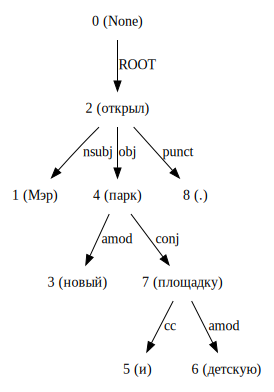

In [25]:
ud_graph = DependencyGraph(tree_str=ud[0])
ud_graph

а вот еще один способ визуализации дерева

In [26]:
ud_tree = ud_graph.tree()
print(ud_tree.pretty_print())

        открыл                      
  ________|_____                     
 |   |         парк                 
 |   |     _____|______              
 |   |    |         площадку        
 |   |    |      ______|________     
Мэр  .  новый   и            детскую

None


In [31]:
# посмотрим, на что вообще можно разбить предложение
list(ud_graph.triples())

[(('открыл', 'VERB'), 'nsubj', ('Мэр', 'NOUN')),
 (('открыл', 'VERB'), 'obj', ('парк', 'NOUN')),
 (('парк', 'NOUN'), 'amod', ('новый', 'ADJ')),
 (('парк', 'NOUN'), 'conj', ('площадку', 'NOUN')),
 (('площадку', 'NOUN'), 'cc', ('и', 'CCONJ')),
 (('площадку', 'NOUN'), 'amod', ('детскую', 'ADJ')),
 (('открыл', 'VERB'), 'punct', ('.', 'PUNCT'))]

**Тройки глагол-объект-субьект:**

Предположим, нам нужно вытащить только ту тройку, которая расскажет о предикате (сказуемом), субъекте (подлежащем) и объекте (дополнении).

In [39]:
def get_sov(UD_parsed_text, elem): # зададим функцию, которая будет вытаскивать нужную тройку
     
    graph = DependencyGraph(tree_str=text[elem])

    sov = {} # пустой словарь, будем в него складывать ключи и значения
    
    for triple in graph.triples(): # для каждого триплета из всех
        if triple[0][1] == 'VERB': # если тег первого элемента - VERB
            sov[triple[0][0]] = {'subj':'','obj':''}
            
    for triple in graph.triples(): # почему
        
        if triple[1] == 'nsubj': # если второй элемент -- существительное
            if triple[0][1] == 'VERB': # при этом если тег первого элемента - VERB
                sov[triple[0][0]]['subj']  = triple[2][0] # сохраняем значение 
        elif triple[1] == 'obj': # соответственно для дополнения
            if triple[0][1] == 'VERB':
                sov[triple[0][0]]['obj'] = triple[2][0]
    return sov

In [43]:
get_sov(ud,0)


print(ud[0])

1	Мэр	МЭР	NOUN	NN	Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing	2	nsubj	_	_
2	открыл	ОТКРЫТЬ	VERB	VBC	Aspect=Perf|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin	0	ROOT	_	_
3	новый	НОВЫЙ	ADJ	JJL	Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing	4	amod	_	_
4	парк	ПАРК	NOUN	NN	Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing	2	obj	_	_
5	и	И	CCONJ	CC	_	7	cc	_	_
6	детскую	детскую	ADJ	JJL	Animacy=Inan|Case=Acc|Gender=Fem|Number=Sing	7	amod	_	_
7	площадку	ПЛОЩАДКА	NOUN	NN	Animacy=Inan|Case=Acc|Gender=Fem|Number=Sing	4	conj	_	SpaceAfter=No
8	.	.	PUNCT	.	_	2	punct	_	_


## идеи дальше:
(на выбор)
1. Выбрать текст (на русском), с которым было бы интересно поработать. Попробовать вытащить все тройки предикат-субъект-объект из выбранного текста, посмотреть на результат, проинтерпретировать
2. Написать функцию,которая бы учитывала сложные сказуемые*(начинает уходить, устал думать)* как единый элемент (она похожа на функцию, которая собирает однородные дополнения, нам также нужно что-то сделать с тегами)
3. попробовать предобученные модели для других языков
4. Попробовать парсеры на предложениях с [синтаксической омонимией](https://github.com/sjut/DPO_Materials/blob/ff1341f1d82ca11a763e15d76601bd6898958323/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5%20%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D1%8F/%D1%81%D0%B8%D0%BD%D1%82_%D0%BD%D0%B5%D0%BE%D0%B4%D0%BD%D0%BE%D0%B7%D0%BD%D0%B0%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C.txt), проинтерпретировать результаты 
(для этого текст, который вы хотите анализировать, необходимо сохранить в переменную одним из удобных способов)

# что есть еще? 

более немейнстримные парсеры

## DeepPavlov

[ссылка на тетрадку с подробностями](https://github.com/nstsj/python_for_CL/blob/master/syntax_parsing/syntax_analysis_DeepPavlov.ipynb)


## SyntaxNet

[SyntaxNet]((https://ai.googleblog.com/2016/05/announcing-syntaxnet-worlds-most.html)) — это гугловская библиотека для определения синтаксических связей (использует нейронную сеть на TensorFlow). Поддерживает 40 языков, в том числе  русский.


## Stanford Parser

* [о проекте](https://nlp.stanford.edu/software/stanford-dependencies.shtml#Languages)
* [о парсере](https://nlp.stanford.edu/software/lex-parser.html)
* [питонская обертка](http://projects.csail.mit.edu/spatial/Stanford_Parser)

## SpaCy

библиотека для различных NLP-задач от (токенизации до NER и др), в том числе умеет делать [синтаксический анализ предложения в грамматике зависимостей](https://spacy.io/usage/linguistic-features#dependency-parse)